# **Trabalho Prático - Introdução à Inferência Estatística**
* Vinícius de Moraes - 13749910
* Bruno Ideriha Sugahara - 10310759
* Raul Ribeiro Teles - 13688176
* Alexandre Marcus Hott Correa - 13837220


## **Importando as Bibliotecas**

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import t
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import random

## **Importando o Dataset**
Anime: Um dataset que contêm 12.294 animes que estão listados no site [MyAnimeList](https://myanimelist.net)

Posteriormente importaremos duas listas em específico que nós coletamos do próprio site, as listas são do Vinícius e do Raul.


In [202]:
anime_data = pd.read_csv('anime.csv')

Removendo valores nulos

In [203]:
anime_data.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [204]:
anime_data.dropna(axis=0, how='any', inplace = True)
anime_data.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [205]:
# Removendo colunas que não serão usadas
colunas_para_remover = ['anime_id']
anime_data = anime_data.drop(colunas_para_remover, axis=1)
# Separando os gêneros em colunas
genre_columns = anime_data['genre'].str.get_dummies(',')
anime_data = pd.concat([anime_data, genre_columns], axis=1)
anime_data.head()

,name,genre,type,episodes,rating,members,Adventure,Cars,Comedy,Dementia,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
anime_data=anime_data.reset_index()

## **Análise Exploratória de Dados**

### **Gêneros mais frequentes**

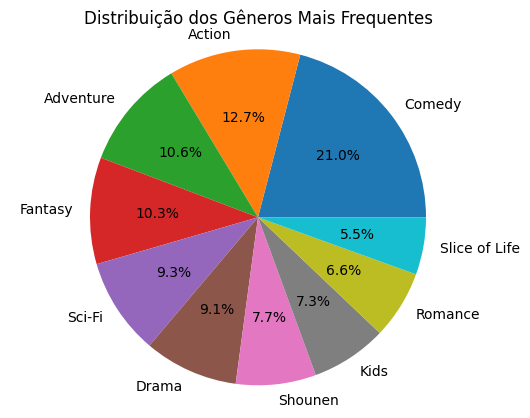

In [207]:
# Calcular a contagem dos gêneros mais frequentes
genre_counts = anime_data['genre'].str.split(',').explode().str.strip().value_counts().head(10)

# Plotar o gráfico de pizza com os gêneros agrupados
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Distribuição dos Gêneros Mais Frequentes')
plt.axis('equal')
plt.show()

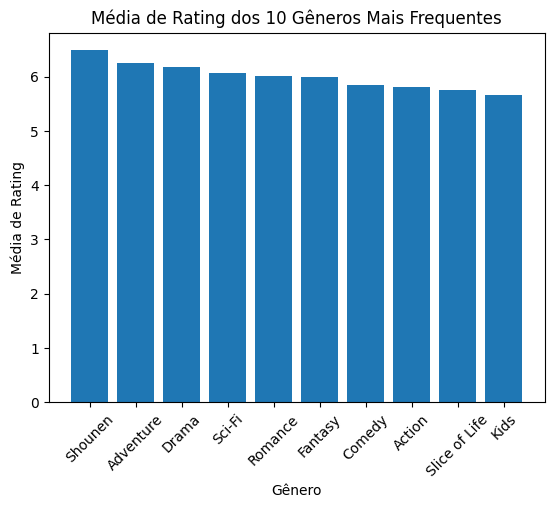

In [208]:
# Filtrar o DataFrame para incluir apenas os registros com os gêneros mais frequentes
top_genres = genre_counts.index.tolist()
df_top_genres = anime_data[anime_data['genre'].isin(top_genres)]

# Calcular a média dos ratings para cada gênero
genre_ratings = df_top_genres.groupby('genre')['rating'].mean().sort_values(ascending=False)

# Plotar o gráfico de barras
plt.bar(genre_ratings.index, genre_ratings)
plt.title('Média de Rating dos 10 Gêneros Mais Frequentes')
plt.xlabel('Gênero')
plt.ylabel('Média de Rating')
plt.xticks(rotation=45)
plt.show()

É difícil analisar os gêneros em comparação a outras variáveis pois é comum que animes tenham mais de um gênero.

### **Exploração da variável rating**

In [209]:
# Cálculo das estatísticas descritivas
media = anime_data['rating'].mean()
mediana = anime_data['rating'].median()
moda = anime_data['rating'].mode().values[0]
desvio_padrao = anime_data['rating'].std()
amplitude = max(anime_data['rating']) - min(anime_data['rating'])

# Impressão das estatísticas descritivas
print(f"Média: {media:.2f}")
print("Mediana: ", mediana)
print("Moda: ", moda)
print(f"Desvio padrão: {desvio_padrao:.2f}")
print(f"Coeficiente de variação: {desvio_padrao/amplitude:.2f}")

Média: 6.48
Mediana:  6.57
Moda:  6.0
Desvio padrão: 1.02
Coeficiente de variação: 0.12


A média, mediana e moda estão relativamente próximas, o que é evidência fraca de uma distribuição simétrica.

Os dados não variam muito, como indica o coeficiente de variação.


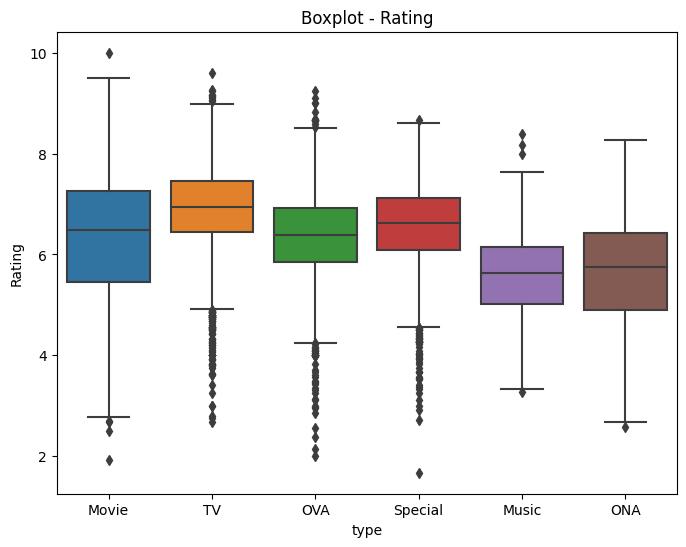

In [210]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=anime_data['rating'], x=anime_data['type'])
plt.title('Boxplot - Rating')
plt.ylabel('Rating')
plt.show()

Filmes e ONAs aparentam variar mais que os outros tipos de mídia. Animes de TV, especiais e OVAs possuem mais outliers.

Todas as categorias possuem interseção, então não possuímos evidência para a relação entre tipo de anime e nota (rating).

<Figure size 800x600 with 0 Axes>

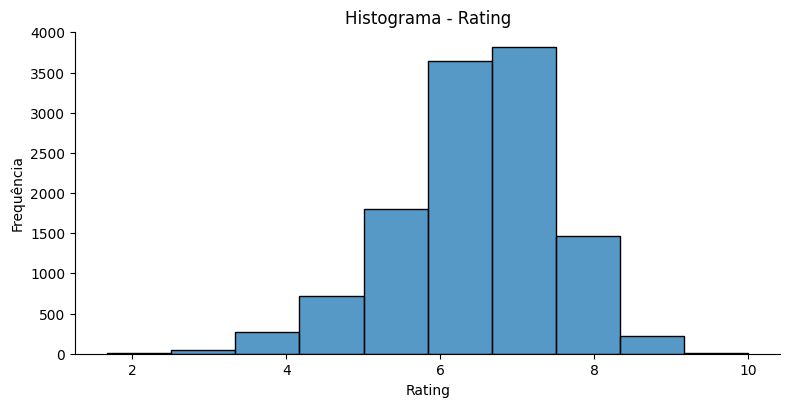

In [211]:
# Histograma
plt.figure(figsize=(8, 6))
sns.displot(anime_data['rating'], height=4, aspect=2, kind='hist', bins=10);
plt.title('Histograma - Rating')
plt.xlabel('Rating')
plt.ylabel('Frequência')
plt.show()

A maioria das notas são maiores do que 5. O que está coerente com as medidas de posição. Valores extremos como aqueles próximos a 10 e 1 são extremamente raros.

### **Exploração da variável número de membros**


In [212]:
# Cálculo das estatísticas descritivas
media_membros = anime_data['members'].mean()
mediana_membros = anime_data['members'].median()
moda_membros = anime_data['members'].mode().values[0]
desvio_padrao_membros = int(anime_data['members'].std())
amplitude_membros = anime_data['members'].max() - anime_data['members'].min()

# Impressão das estatísticas descritivas
print(f"Média: {media_membros:.2f}")
print("Mediana: ", mediana_membros)
print("Moda: ", moda_membros)
print("Desvio padrão: ", desvio_padrao_membros)
print("Amplitude: ", amplitude_membros)
print(f"Coeficiente de variação {desvio_padrao_membros/amplitude_membros:.2f}")

Média: 18348.88
Mediana:  1552.0
Moda:  60
Desvio padrão:  55372
Amplitude:  1013905
Coeficiente de variação 0.05


As medidas de posição são bem diferentes, diferindo até em ordem de magnitude.

O coeficiente de variação é bem pequeno, o que é evidência fraca de que os dados estão bem concentrados.

<Figure size 800x600 with 0 Axes>

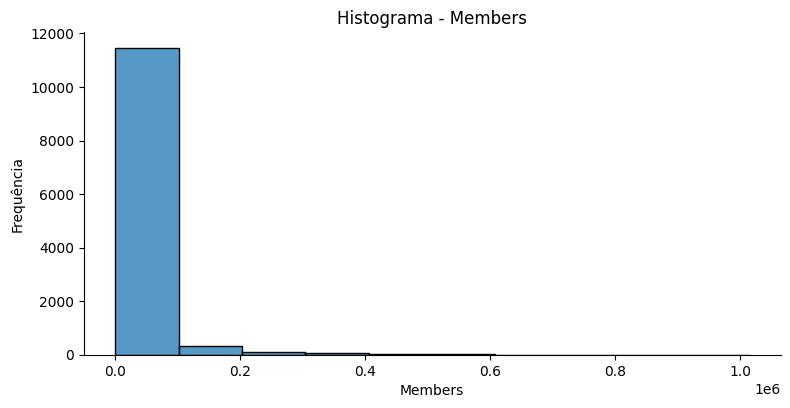

In [213]:
# Histograma
plt.figure(figsize=(8, 6))
sns.displot(anime_data['members'], height=4, aspect=2, kind='hist', bins=10);
plt.title('Histograma - Members')
plt.xlabel('Members')
plt.ylabel('Frequência')
plt.show()

O histograma está de acordo com as medidas de variação: a quantidade de membros está concentrada em uma região.

## **Teste para normalidade dos dados**

###**Normalidade das notas**

In [214]:
shapiro_test = shapiro(anime_data['rating'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [215]:
shapiro_test[0]

0.9833153486251831

In [216]:
shapiro_test.pvalue

3.824706485845143e-35

In [217]:
if shapiro_test.pvalue < 0.05: print ('Rejeito H0')
else: print ('Não rejeito H0')

Rejeito H0


###**Normalidade dos membros**

In [218]:
shapiro_test = shapiro(anime_data['members'])

In [219]:
shapiro_test[0]

0.34844690561294556

In [220]:
shapiro_test.pvalue

0.0

In [221]:
if shapiro_test.pvalue < 0.05: print ('Rejeito H0')
else: print ('Não rejeito H0')

Rejeito H0


## **Teste de Comparação de Médias**

In [222]:
anime_data = pd.read_csv('anime.csv')

###**Notas reais e declaradas  - Teste t pareado**



In [223]:
def adicionar_myanimelist(path, id):
  if '.xml' in path:
    myanimelist = pd.read_xml(path)
  else:
    myanimelist = pd.read_csv(path)
  myanimeswatched = myanimelist['series_title']
  myanimeswatched = list(myanimeswatched)
  myanimelist = myanimelist[['my_id','series_animedb_id', 'my_score']]
  myanimelist = myanimelist.rename(columns = {'my_id':'user_id', 'series_animedb_id':'anime_id', 'my_score':'rating'})
  for i in range (len(myanimelist)):
    elem = myanimelist.iloc[i]
    if elem['rating'] == 0:
      myanimelist.at[i, 'rating'] = -1
  for i in range (len(myanimelist)):
    elem = myanimelist.iloc[i]
    myanimelist.at[i, 'user_id'] = id
  return myanimeswatched, myanimelist

In [224]:
myanimeswatched_vinicius, myanimelist_vinicius = adicionar_myanimelist('Boemio.csv',0)

In [225]:
myanimelist_vinicius

,user_id,anime_id,rating
0,0,29978,-1
1,0,41380,1
2,0,40148,3
3,0,31646,10
4,0,35180,10
...,...,...,...
384,0,23225,8
385,0,30279,8
386,0,12403,8
387,0,36999,9


In [ ]:
df = pd.DataFrame()
df_my_rating = pd.DataFrame()
for i in range(0, len(anime_data)):
  if anime_data['name'].iloc[i] in myanimeswatched_vinicius:
    anime_id = anime_data['anime_id'].iloc[i]
    for j in range(0, len(myanimelist_vinicius)):
      if anime_id == myanimelist_vinicius['anime_id'].iloc[j]:
        df = df.append(anime_data.iloc[i])
        df_my_rating = df_my_rating.append(myanimelist_vinicius.iloc[j])

In [227]:
df = df.reset_index(drop=True)
del df['genre']
del df['type']
del df['episodes']
del df['members']
del df['anime_id']

In [228]:
df

,name,rating
0,Kimi no Na wa.,9.37
1,Fullmetal Alchemist: Brotherhood,9.26
2,Steins;Gate,9.17
3,Hunter x Hunter (2011),9.13
4,Koe no Katachi,9.05
...,...,...
187,Kizumonogatari III: Reiketsu-hen,NaN
188,Kobayashi-san Chi no Maid Dragon,NaN
189,One Room,NaN
190,Tsugumomo,NaN


In [229]:
df_my_rating = df_my_rating.reset_index(drop=True)
del df_my_rating['anime_id']
del df_my_rating['user_id']

In [230]:
df_my_rating = df_my_rating.rename(columns={'rating': 'my_rating'})

In [231]:
df_my_rating

,my_rating
0,2
1,9
2,10
3,9
4,8
...,...
187,9
188,6
189,2
190,7


In [232]:
df_merged = pd.concat([df,df_my_rating], axis=1)

In [233]:
df_merged

,name,rating,my_rating
0,Kimi no Na wa.,9.37,2
1,Fullmetal Alchemist: Brotherhood,9.26,9
2,Steins;Gate,9.17,10
3,Hunter x Hunter (2011),9.13,9
4,Koe no Katachi,9.05,8
...,...,...,...
187,Kizumonogatari III: Reiketsu-hen,NaN,9
188,Kobayashi-san Chi no Maid Dragon,NaN,6
189,One Room,NaN,2
190,Tsugumomo,NaN,7


In [234]:
del df_merged['name']

In [235]:
df_merged['Diferença'] = df_merged['rating']-df_merged['my_rating']
np.asarray(df_merged['Diferença'])

array([ 7.37,  0.26, -0.83,  0.13,  1.05, 10.04,  3.98, -0.07,  1.93,
        0.92, -0.16,  3.83,  1.82, -0.2 ,  9.78, -1.22, -0.27,  1.71,
       -0.32,  4.65, -1.35, -0.36,  2.62,  1.61,  9.61,  0.61,  0.55,
        2.54,  0.51, -0.49, -0.48,  9.5 ,  0.5 ,  9.5 ,  0.48,  1.47,
       -0.55, -1.55,  1.45, -1.57,  7.42,  9.4 , -0.61,  3.39,  9.39,
        0.38, -1.63,  9.37, -0.64,  3.36,  9.36,  9.35,  1.33,  9.33,
        9.33,  9.32,  0.32, -1.68,  9.32, -0.73,  1.24, -0.76,  0.24,
        3.24, -1.77,  9.23,  9.22, -0.79, -0.79, -0.8 ,  0.19,  0.18,
       -0.83,  0.17,  0.15,  9.14, -0.89,  2.11,  9.08,  6.07,  5.07,
        9.06,  0.06, -0.94,  9.06,  9.05,  0.04,  5.03,  0.03,  0.03,
        9.03,  1.01,  9.01,  8.99, -0.05,  8.95, -0.05,  3.94, -0.06,
       -2.07, -1.07,  2.92, -0.11,  3.88,  8.88,  4.88, -0.13,  8.87,
        3.84,  5.84,  3.83,  6.82,  0.81, -0.19,  8.78, -0.23,  0.77,
        2.76,  8.76, -2.25,  0.71,  6.7 ,  8.7 , -0.3 ,  0.7 , -0.3 ,
        3.69,  8.68,

<Axes: >

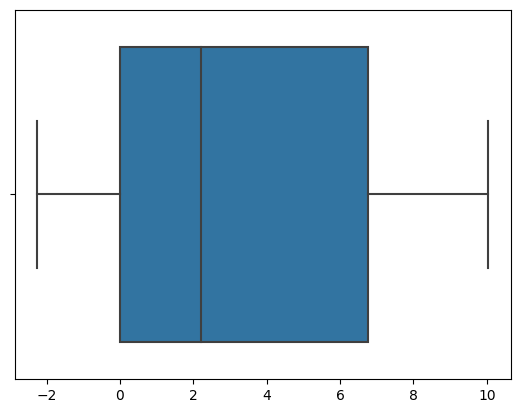

In [236]:
sns.boxplot(x=df_merged['rating']-df_merged['my_rating'])

In [237]:
df1 = pd.DataFrame(df_merged['rating'])
df1.rename(columns={'rating': 'Nota'}, inplace=True)
df1['Tipo'] = 'rating'

df2 = pd.DataFrame(df_merged['my_rating'])
df2.rename(columns={'my_rating': 'Nota'}, inplace=True)
df2['Tipo'] = 'my_rating'

dados_empilhados = pd.concat([df1, df2], verify_integrity=True,ignore_index=True)
dados_empilhados

,Nota,Tipo
0,9.37,rating
1,9.26,rating
2,9.17,rating
3,9.13,rating
4,9.05,rating
...,...,...
379,9.00,my_rating
380,6.00,my_rating
381,2.00,my_rating
382,7.00,my_rating


Dados empilhados

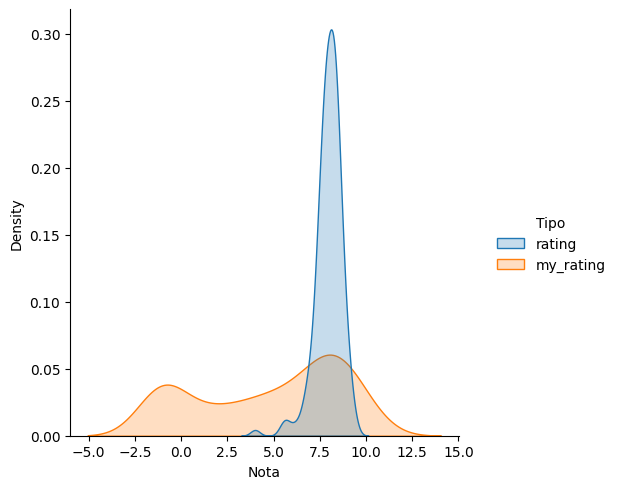

In [238]:
sns.displot(data=dados_empilhados, x='Nota', hue='Tipo', kind='kde', fill=True)

In [239]:
shapiro_test = shapiro(np.asarray(df_merged['Diferença'].dropna()))
shapiro_test

ShapiroResult(statistic=0.8875289559364319, pvalue=3.206100107622234e-10)

Vamos supor, para a aplicação do teste, que é razoável supor a normalidade e que os dados tem a mesma variância

In [240]:
stats.ttest_rel(df_merged['rating'], df_merged['my_rating'], alternative='two-sided')

TtestResult(statistic=nan, pvalue=nan, df=nan)

Conclusão: rejeito a hipótese que as médias são iguais

### **Notas de dois usuários diferentes - Teste t para populações independentes**

In [241]:
myanimeswatched_raul, myanimelist_raul = adicionar_myanimelist('MyAngelROxy.csv',1)

In [ ]:
df_raul = pd.DataFrame()
df_vinicius = pd.DataFrame()
for i in range(0, len(myanimelist_raul)):
  for j in range(0, len(myanimelist_vinicius)):
    if myanimelist_raul['anime_id'].iloc[i] == myanimelist_vinicius['anime_id'].iloc[j]:
      df_raul = df_raul.append(myanimelist_raul.iloc[i])
      df_vinicius = df_vinicius.append(myanimelist_vinicius.iloc[j])

In [243]:
df_raul = df_raul.reset_index(drop=True)
del df_raul['anime_id']
del df_raul['user_id']

In [244]:
df_vinicius = df_vinicius.reset_index(drop=True)
del df_vinicius['anime_id']
del df_vinicius['user_id']
df_vinicius = df_vinicius.rename(columns={'rating': 'vini_rating'})

In [245]:
df_merged = pd.concat([df_raul,df_vinicius], axis=1)

In [246]:
df_merged

,rating,vini_rating
0,5,3
1,6,4
2,8,9
3,8,9
4,8,8
...,...,...
111,9,8
112,9,8
113,9,8
114,9,9


In [247]:
shapiro(df_raul['rating'])

ShapiroResult(statistic=0.8893516063690186, pvalue=8.678545526663584e-08)

In [248]:
shapiro(df_vinicius['vini_rating'])

ShapiroResult(statistic=0.8841931819915771, pvalue=4.9780783939468165e-08)

Vamos supor, para a aplicação do teste, que é razoável supor a normalidade e que os dados tem a mesma variância

In [249]:
df1 = pd.DataFrame(df_merged['rating'])
df1.rename(columns={'rating': 'Nota'}, inplace=True)
df1['Tipo'] = 'rating'

df2 = pd.DataFrame(df_merged['vini_rating'])
df2.rename(columns={'vini_rating': 'Nota'}, inplace=True)
df2['Tipo'] = 'vini_rating'

dados_empilhados = pd.concat([df1, df2], verify_integrity=True,ignore_index=True)
dados_empilhados

,Nota,Tipo
0,5,rating
1,6,rating
2,8,rating
3,8,rating
4,8,rating
...,...,...
227,8,vini_rating
228,8,vini_rating
229,8,vini_rating
230,9,vini_rating


Dados empilhados

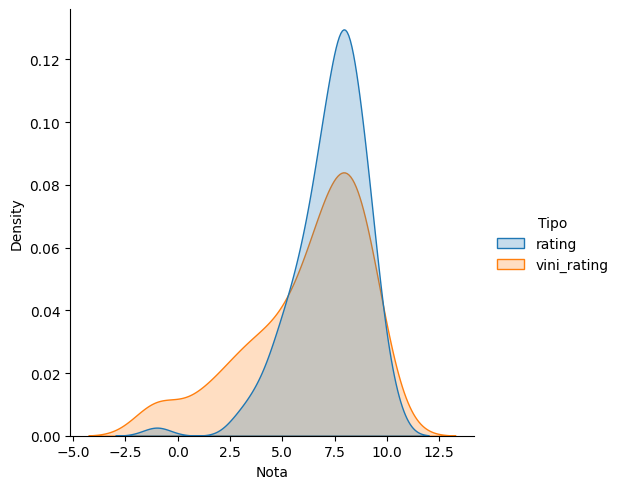

In [250]:
sns.displot(data=dados_empilhados, x='Nota', hue='Tipo', kind='kde', fill=True)

In [251]:
stats.ttest_ind(df_raul['rating'],df_vinicius['vini_rating'])

Ttest_indResult(statistic=3.6224449278437523, pvalue=0.00035909600651214086)

Conclusão: rejeito a hipótese que as médias são iguais

### **Nota de quatro usuários diferentes - ANOVA**

In [ ]:
df_raul = pd.DataFrame()
df_vinicius = pd.DataFrame()
df_neko = pd.DataFrame()
for i in range(0, len(myanimelist_raul)):
  for j in range(0, len(myanimelist_vinicius)):
    if myanimelist_raul['anime_id'].iloc[i] == myanimelist_vinicius['anime_id'].iloc[j]:
      df_raul = df_raul.append(myanimelist_raul.iloc[i])
      df_vinicius = df_vinicius.append(myanimelist_vinicius.iloc[j])

In [253]:
df_raul = df_raul.reset_index(drop=True)
del df_raul['anime_id']
del df_raul['user_id']
df_raul = df_raul.rename(columns={'rating': 'raul_rating'})

In [254]:
df_vinicius = df_vinicius.reset_index(drop=True)
del df_vinicius['anime_id']
del df_vinicius['user_id']
df_vinicius = df_vinicius.rename(columns={'rating': 'vini_rating'})

In [255]:
df_merged = pd.concat([df_raul,df_vinicius], axis=1)

In [256]:
usuario_random = []
for i in range(0, len(df_vinicius)):
  if i%2 == 0:
    usuario_random.append(df_vinicius['vini_rating'].iloc[i]-random.randint(0, 3))
  else:
    usuario_random.append(df_vinicius['vini_rating'].iloc[i]+random.randint(0, 3))
for i in range(0, len(usuario_random)):
  if usuario_random[i] < 1:
    usuario_random[i] = 1
  if usuario_random[i] > 10:
    usuario_random[i] = 10

In [257]:
usuario_random_2 = []
for i in range(0, len(df_raul)):
  if i%2 == 0:
    usuario_random_2.append(df_raul['raul_rating'].iloc[i]-random.randint(0, 3))
  else:
    usuario_random_2.append(df_raul['raul_rating'].iloc[i]+random.randint(0, 3))
for i in range(0, len(usuario_random_2)):
  if usuario_random_2[i] < 1:
    usuario_random_2[i] = 1
  if usuario_random_2[i] > 10:
    usuario_random_2[i] = 10

In [258]:
df_merged['random_rating'] = usuario_random
df_merged['random_rating_2'] = usuario_random_2

In [259]:
df_merged

,raul_rating,vini_rating,random_rating,random_rating_2
0,5,3,1,5
1,6,4,4,8
2,8,9,7,6
3,8,9,10,10
4,8,8,8,5
...,...,...,...,...
111,9,8,9,9
112,9,8,8,8
113,9,8,8,10
114,9,9,9,6


In [260]:
df_merged.describe()

,raul_rating,vini_rating,random_rating,random_rating_2
count,116.000000,116.000000,116.000000,116.000000
mean,7.293103,6.181034,6.172414,7.206897
std,1.719541,2.824117,2.785914,2.112148
min,-1.000000,-1.000000,1.000000,1.000000
25%,6.000000,4.750000,4.000000,6.000000
50%,8.000000,7.000000,6.000000,7.000000
75%,8.000000,8.000000,8.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000


<Axes: >

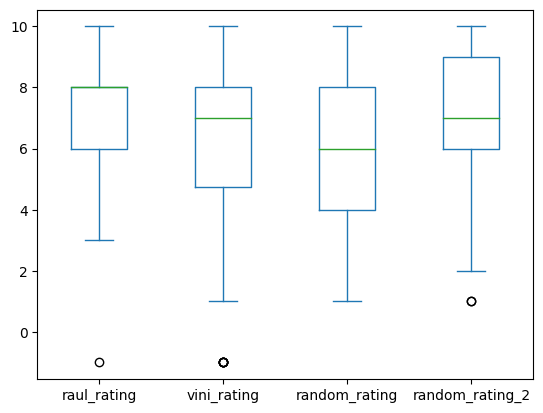

In [261]:
df_merged.plot.box()

In [262]:
shapiro_test, p1 = stats.shapiro(df_merged['raul_rating'])
shapiro_test, p2 = stats.shapiro(df_merged['vini_rating'])
shapiro_test, p3 = stats.shapiro(df_merged['random_rating'])
shapiro_test, p4 = stats.shapiro(df_merged['random_rating_2'])

print(p1, p2, p3, p4)

8.678545526663584e-08 4.9780783939468165e-08 6.906097951286938e-06 1.6340169167960994e-05


Vamos supor, para a aplicação do teste, que é razoável supor a normalidade e que os dados tem a mesma variância

In [263]:
F, p = f_oneway(df_merged['raul_rating'], df_merged['vini_rating'], df_merged['random_rating'], df_merged['random_rating_2'])

print(F, p)

7.719484255838976 4.848752900528174e-05


In [264]:
dados_melt = pd.melt(df_merged.reset_index(), id_vars=['index'], value_vars=['raul_rating', 'vini_rating', 'random_rating', 'random_rating_2'])
dados_melt.columns = ['index', 'Tipo', 'Métrica']
dados_melt

,index,Tipo,Métrica
0,0,raul_rating,5
1,1,raul_rating,6
2,2,raul_rating,8
3,3,raul_rating,8
4,4,raul_rating,8
...,...,...,...
459,111,random_rating_2,9
460,112,random_rating_2,8
461,113,random_rating_2,10
462,114,random_rating_2,6


<Axes: xlabel='Tipo', ylabel='Métrica'>

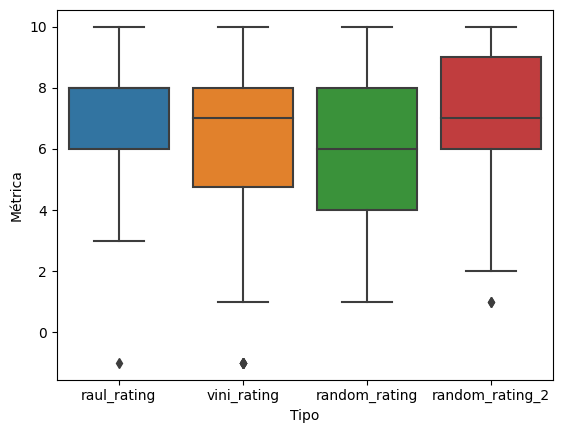

In [265]:
sns.boxplot(data=dados_melt, y='Métrica', x='Tipo')

In [266]:
model = ols('Métrica ~ C(Tipo)', data=dados_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Tipo),134.058190,3.0,7.719484,0.000048
Residual,2662.818966,460.0,NaN,NaN


Conclusão: Como PR < F, temos fortes evidências para rejeitar a hipótese que as médias são iguais.
